In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
datos_maraton = pd.read_csv('MarathonData.csv')
datos_maraton.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [4]:
datos_maraton.shape

(87, 10)

In [9]:
datos_maraton.dtypes

id                 int64
Marathon          object
Name              object
Category          object
km4week          float64
sp4week          float64
CrossTraining     object
Wall21           float64
MarathonTime     float64
CATEGORY          object
dtype: object

In [6]:
datos_maraton.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [7]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [8]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

In [10]:
datos_maraton.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

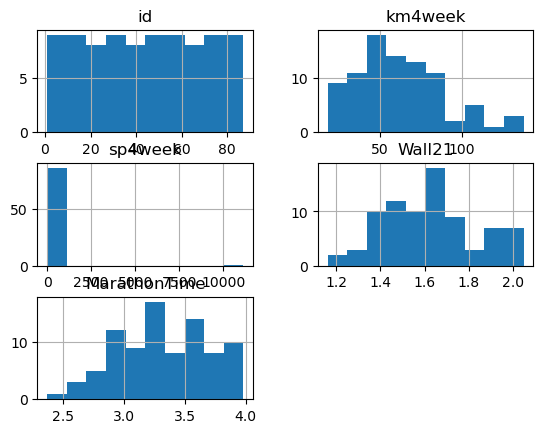

In [11]:
datos_maraton.hist()

In [12]:
datos_maraton = datos_maraton.drop(columns=['Name'])
datos_maraton = datos_maraton.drop(columns=['id'])
datos_maraton = datos_maraton.drop(columns=['Marathon'])
datos_maraton = datos_maraton.drop(columns=['CATEGORY'])
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [15]:
datos_maraton.isna().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
dtype: int64

In [14]:
#relleno con ceros
datos_maraton["CrossTraining"] = datos_maraton["CrossTraining"].fillna(0)
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [16]:
datos_maraton = datos_maraton.dropna(how='any')
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [19]:
#trato los datos no numericos
datos_maraton['CrossTraining'].unique()

array([0, 1, 3, 5, 2, 4])

In [18]:
valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
datos_maraton.replace(valores_cross, inplace=True)
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [20]:
datos_maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [21]:
valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
datos_maraton.replace(valores_categoria, inplace=True)
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


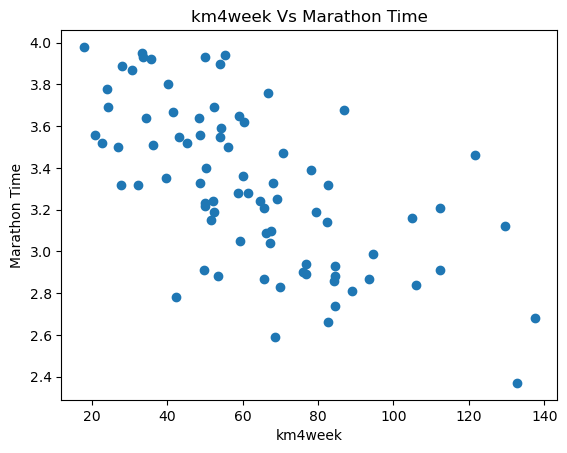

In [22]:
plt.scatter(x = datos_maraton['km4week'], y=datos_maraton['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

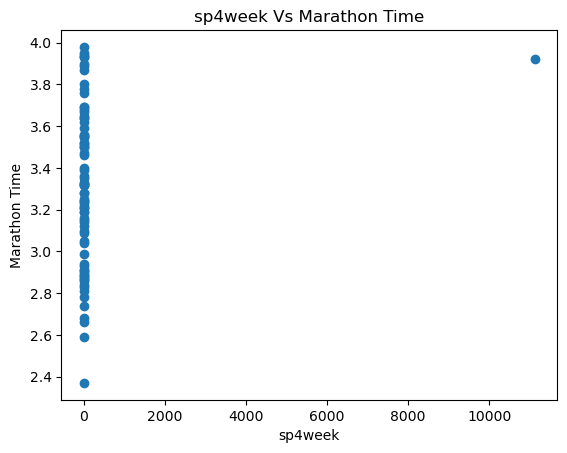

In [23]:
plt.scatter(x = datos_maraton['sp4week'], y=datos_maraton['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [24]:
datos_maraton = datos_maraton.query('sp4week<1000')

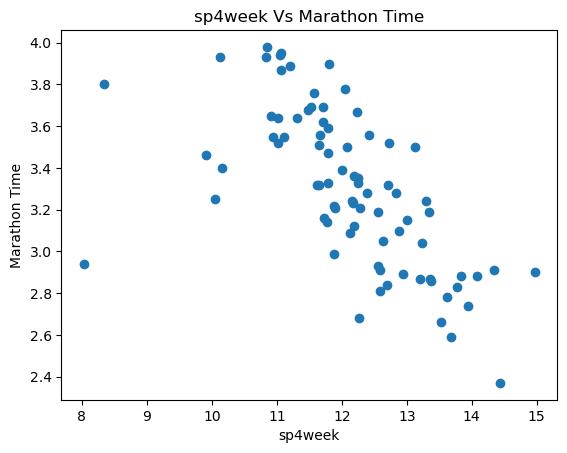

In [25]:
plt.scatter(x = datos_maraton['sp4week'], y=datos_maraton['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

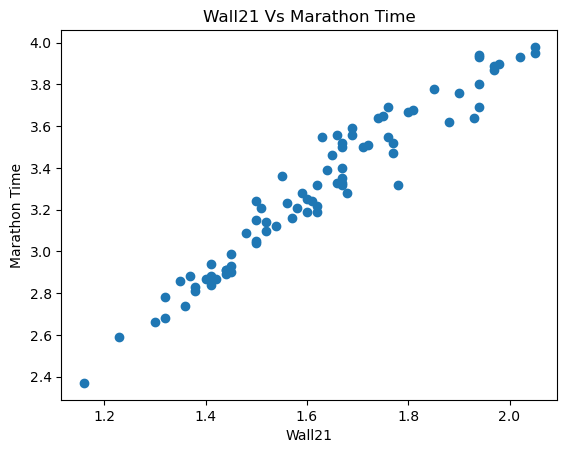

In [26]:
plt.scatter(x = datos_maraton['Wall21'], y=datos_maraton['MarathonTime'])
plt.title('Wall21 Vs Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

In [27]:
corr_matrix = datos_maraton.corr(method='pearson')

corr_matrix

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
Category,1.000000,0.142042,-0.087676,0.057433,0.080648,0.042429
km4week,0.142042,1.000000,0.223927,-0.250117,-0.572997,-0.623238
sp4week,-0.087676,0.223927,1.000000,-0.153544,-0.624785,-0.639466
CrossTraining,0.057433,-0.250117,-0.153544,1.000000,0.195196,0.184035
Wall21,0.080648,-0.572997,-0.624785,0.195196,1.000000,0.968751
MarathonTime,0.042429,-0.623238,-0.639466,0.184035,0.968751,1.000000


In [28]:
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [29]:
#Separamos los datos entre X e y
X = datos_maraton[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21']]
y = datos_maraton['MarathonTime']

In [30]:
#Separamos los datos entre entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#Entrenando el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
#Recuperamos la intersección
print(regressor.intercept_)

1.2082273815679954


In [33]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Category,-0.005381
km4week,-0.001531
sp4week,-0.029130
CrossTraining,-0.004864
Wall21,1.574377


In [34]:
y_pred = regressor.predict(X_test)
y_pred

array([3.52721502, 3.10107814, 3.21153178, 3.83985011, 3.40926652,
       3.93308389, 3.57966258, 3.80906119, 3.45902034, 3.75508861,
       3.53928907, 3.5603445 , 2.72904104, 3.93532573, 3.45690253,
       3.22764014])

In [35]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
54,3.47,3.527215
28,3.15,3.101078
31,3.19,3.211532
84,3.94,3.839850
47,3.35,3.409267
76,3.80,3.933084
70,3.68,3.579663
72,3.69,3.809061
50,3.40,3.459020
74,3.76,3.755089


In [36]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error porcentual : %f" % (error*100))

Error porcentual : 9.029979


In [37]:
r2_score(y_test, y_pred)

0.920031061504454

In [38]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [39]:
regressor.predict(nuevo_corredor)

array([2.21181099])

In [40]:
nuevo_corredor = pd.DataFrame(np.array([[2,100,30,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,2.0,100.0,30.0,0.0,1.4


In [41]:
regressor.predict(nuevo_corredor)

array([2.37455806])